***
**DATA INGESTION**   
* Loaded dataset using pandas pd.read_csv() function.  
* Displayed first few rows with .head() method.  

In [41]:
import pandas as pd

df = pd.read_csv("heart_disease.csv")
print(df.head())

df.head()
# Display the first few rows of the dataset

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


***
**DATA CLEANING**    
* Check for missing values using .isnull().sum() method.  
* Strategy for dealing with missing values (imputation or removal).   
* Identify and correct outliers or incorrect entries.  

In [22]:
import pandas as pd

df = pd.read_csv("heart_disease.csv")

df.isnull().sum()
# Check for missing values in the dataset

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

✤ *Results: Dataset contains no missing values*

In [23]:
import pandas as pd

df = pd.read_csv("heart_disease.csv")

df.describe()
# Check for outliers in the dataset

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


✤ *Values reviewed and may represent medical conditions*

***
**DATA EXPLORATION & VISUALIZATION**   
* Use matplotlib and seaborn for visual analysis. 
* Create histogram for age, blood pressure; scatter plot for relationship between cholesterol levels and CVD risks. 
* Calculate correlation using .corr() method to identify predictors for CVD risk

**Age Histogram**

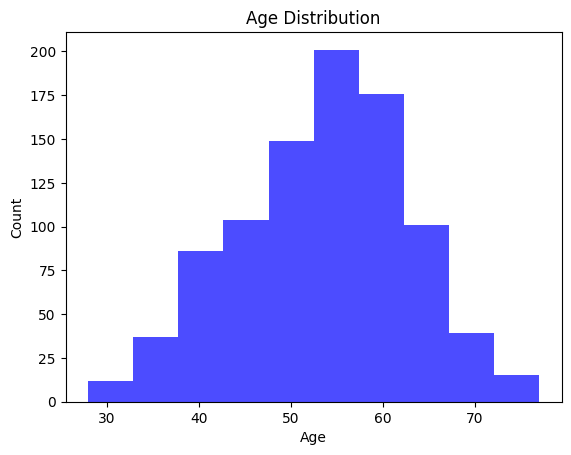

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("heart_disease.csv")

# Age Histogram
plt.hist(df['age'], bins=10, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# print(df.columns.tolist())


**Blood Pressure Histogram**

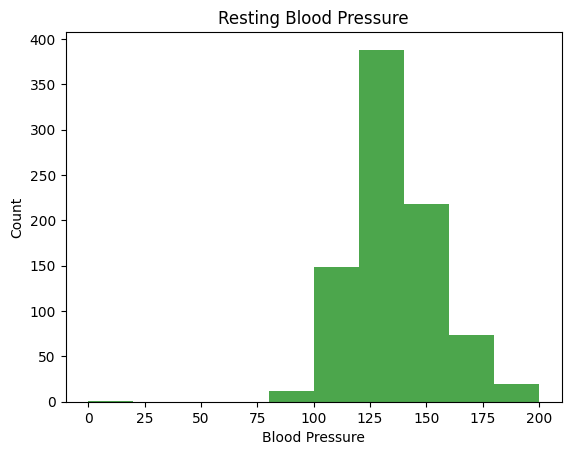

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("heart_disease.csv")

# Blood Pressure Histogram
plt.hist(df['trestbps'], bins=10, color='green', alpha=0.7)
plt.title('Resting Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()



**Cholesterol vs CVD Scatter Plot**

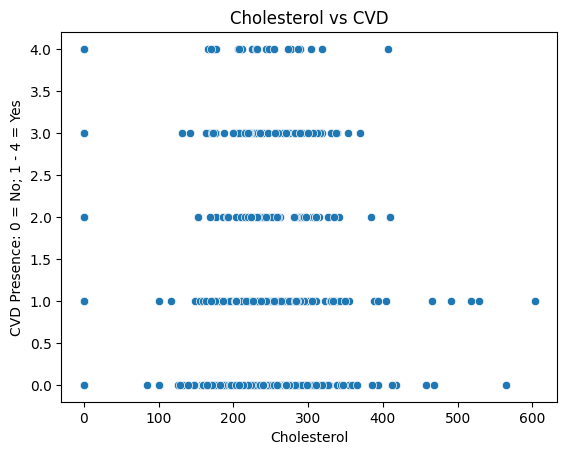

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("heart_disease.csv")

# Cholesterol vs CVD Scatter Plot
plt.figure()
sns.scatterplot(
    x="chol",
    y="num",
    data=df
)
plt.title('Cholesterol vs CVD')
plt.xlabel('Cholesterol')
plt.ylabel('CVD Presence: 0 = No; 1 - 4 = Yes')
plt.show()


✤ *Scatter plot shows the relationship between cholesterol levels and cardiovascular disease* 

**Correlation Calculations**

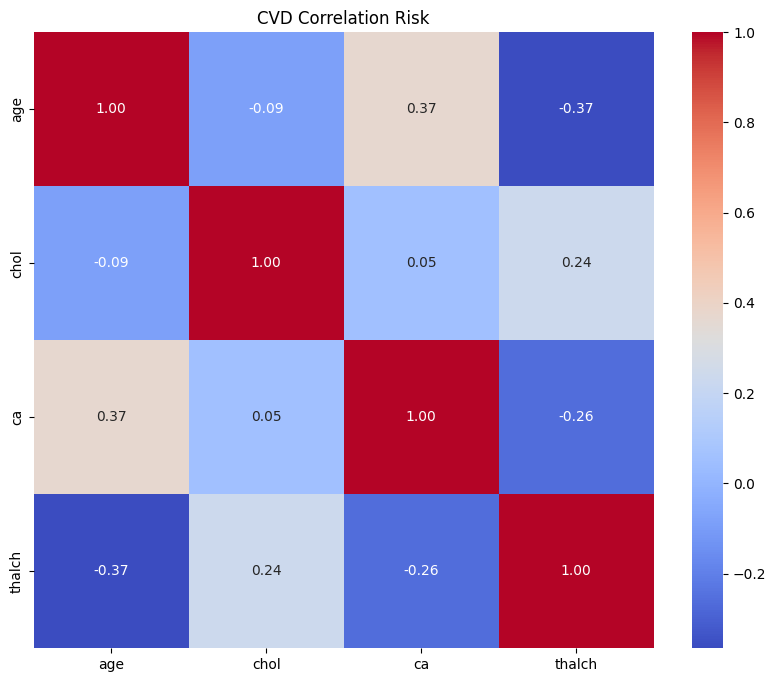

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("heart_disease.csv")

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number', 'bool']).drop('id', axis=1).astype(float)

# Correlation Calculation
columns_to_use = ['age', 'chol', 'ca', 'thalch']
correlation_matrix = numeric_df[columns_to_use].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('CVD Correlation Risk')
plt.show()

***
**Applying ML Techniques**
* Import ML model 
* Split the data into training and testing sets using train_test_split from sklearn.model_selection 
* Train the model on the training data and evaluate its accuracy on the test set using the .score() method

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("heart_disease.csv")

# Drop categorical and ID columns, keep only numeric features
X = df.select_dtypes(include=['number', 'bool']).drop('id', axis=1).drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")
accuracy



Model Accuracy: 0.5163


0.5163043478260869

✤ *The regression model achieved and accuracy of approx. 51.6%*